In [1]:
# REFERENCE FUNCTIONS

In [2]:
import pandas as pd
import numpy as np
import _general as GenFun
import _catenary_flexible as Flex

In [3]:
# INPUT DATA

In [4]:
## CALCULATION AND DESIGN CONSTANTS
### Calculation variables

In [5]:
xRound=1
xStep=1
xMultiplier=1
yMultiplier=1
xStaticMultiplier=0.2
yStaticMultiplier=10

In [6]:
### Design variables (Base Units [ft, lbf])

In [7]:
MaxHASpacing=30
minCW_P=0
MinHALength=3/12
HA_Accuracy=1/50/12
SteadyArmLength=3

In [8]:
## CONDUCTOR PARTICULARS AND LOADING CONDITIONS

In [9]:
Conductors = pd.DataFrame(
    {'Type': ['Messenger Wire', 'Contact Wire', 'Hangers'],
    'Weight': [1.544,1.063,0.2],
    'Tension': [5000,3300,0]})

In [10]:
## LAYOUT DESIGN

In [11]:
df=pd.read_csv('InputData.csv')

In [12]:
## DISCRETE SPAN LOADS AND DESIGN CONDITIONS
### Discrete span loads. + weight is in the downward direction

In [13]:
STA_DiscreteLoad_CW = np.array([162298,162612,0])
P_DiscreteLoad_CW = np.array([5,10,0])
STA_DiscreteLoad_MW = np.copy(STA_DiscreteLoad_CW)
P_DiscreteLoad_MW = np.array([0,0,0])

In [14]:
#Steady arms with fixed elevations (applied load calculated by span geometry)

In [15]:
ExpectedSupport_P = 5
STA_FixedSupport_CW=np.array([0,0,0,0])
FixedSupport_EL_Tolerance = 0.1/12

In [16]:
#Critical Clearance Stationing and Elevation

In [17]:
ClearanceSTA = np.array([0,0])
ClearanceEL = np.array([0,0])

In [18]:
#Stationing of Interest

In [19]:
FocusStation=165250
FocusNeg:350
FocusPos=350

In [20]:
# CALCULATIONS

In [21]:
FullWireRun=GenFun.WireRun_df(df,xRound)
FullWireRun['PreSag']=0
FullWireRun

,PoleID,STA,Rail EL,MW Height,CW Height,PreSag,Deviation Angle,SpanLength
0,1,162297.0,0,24.00,20.000000,0,0,155.0
1,2,162452.0,0,23.50,19.250000,0,0,160.0
2,3,162612.0,0,23.50,18.500000,0,0,133.0
3,4,162745.0,0,22.50,18.500000,0,0,150.0
4,5,162895.0,0,22.50,18.500000,0,0,173.0
5,6,163068.0,0,22.50,18.500000,0,0,190.0
6,7,163258.0,0,22.50,18.500000,0,0,190.0
7,8,163448.0,0,22.50,18.500000,0,0,190.0
8,9,163638.0,0,22.50,18.500000,0,0,190.0
9,10,163828.0,0,22.25,18.250000,0,0,186.0


In [22]:
L_DesignBase=[xStep,xRound,xMultiplier,yMultiplier,SteadyArmLength]
L_SpanLoading=[P_DiscreteLoad_CW,STA_DiscreteLoad_CW,P_DiscreteLoad_MW,STA_DiscreteLoad_MW]
L_DesignHA=[MaxHASpacing,minCW_P,MinHALength,HA_Accuracy]
L_StaticCWLoading=[-25,162475]

In [23]:
Nominal = Flex.CatenarySag_Flexible(FullWireRun,Conductors['Weight'],
                                    Conductors['Tension'],L_SpanLoading,L_DesignHA,L_DesignBase)
# Nominal dictionary keys
# Stationing, HA_STA, HA_EL
# LoadedSag, SupportLoad_CW, P_SpanWeight
# LoadedSag_MW, SupportLoad_MW, P_SpanWeight_MW

subloop = 1


In [24]:
Uplift, cloops, NewCWSupportReaction = Flex.CatenarySag_FlexibleHA_Iterative(FullWireRun, 0*Conductors['Weight'],
                                                                             Conductors['Tension'], L_DesignHA,
                                                                             L_DesignBase, L_StaticCWLoading, Nominal)
# Uplift dictionary keys
# Stationing, HA_STA, HA_EL
# LoadedSag, SupportLoad_CW, P_SpanWeight
# LoadedSag_MW, SupportLoad_MW, P_SpanWeight_MW

Main Loops= 4 subLoop2= 0 subLoop1= 0


In [25]:
FocusSPT = 2
StartSPT = FocusSPT-1
EndSPT = FocusSPT+1
Elasticity = Flex.CatenaryElasticity_FlexibleHA(FullWireRun, 0*Conductors['Weight'], 
                                                Conductors['Tension'], L_DesignHA, L_DesignBase, 25, 1, 
                                                Nominal, StartSPT, EndSPT)
# Elasticity dictionary keys
# STAVal, DiffMIN, DiffMAX, CycleLoops

Elasticity with uplift at STA= 162452.0
Main Loops= 2 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162453.0
Main Loops= 2 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162454.0
Main Loops= 2 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162455.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162456.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162457.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162458.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162459.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162460.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162461.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162462.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162463.0
Main Loops= 3 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162464.0
Main Loops= 3 subLoop2= 

Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162558.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162559.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162560.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162561.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162562.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162563.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162564.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162565.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162566.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162567.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162568.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162569.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at 

Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162664.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162665.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162666.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162667.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162668.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162669.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162670.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162671.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162672.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162673.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162674.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at STA= 162675.0
Main Loops= 4 subLoop2= 0 subLoop1= 0
Elasticity with uplift at 

In [26]:
# OUTPUT

In [27]:
import seaborn as sns


In [28]:
NominalSag = pd.DataFrame({'Stationing': np.append(Nominal.get('Stationing'),Nominal.get('Stationing')),
               'Sag': np.append(Nominal.get('LoadedSag'),Nominal.get('LoadedSag_MW')),
               'Cable Type': np.append((Nominal.get('LoadedSag')*0),Nominal.get('LoadedSag_MW')*0+1)})
NominalSag=NominalSag.pivot(index='Stationing', columns='Cable Type', values='Sag')
NominalSag.head()

Cable Type,0.0,1.0
Stationing,,
162297.0,20.009060,24.000000
162298.0,20.010994,23.948176
162299.0,20.014007,23.896701
162300.0,20.018100,23.845575
162301.0,20.022516,23.794797


<Axes: xlabel='Stationing'>

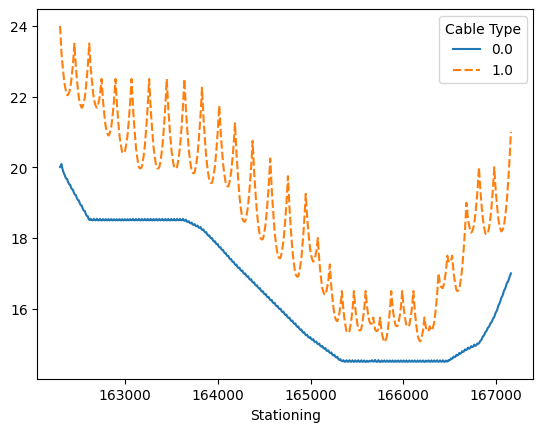

In [29]:
sns.lineplot(data=NominalSag)

In [30]:
UpliftSag = pd.DataFrame({'Stationing': np.append(Uplift.get('Stationing'),Uplift.get('Stationing')),
               'Sag': np.append(Uplift.get('LoadedSag'),Uplift.get('LoadedSag_MW')),
               'Cable Type': np.append((Uplift.get('LoadedSag')*0),Uplift.get('LoadedSag_MW')*0+1)})
UpliftSag=UpliftSag.pivot(index='Stationing', columns='Cable Type', values='Sag')
UpliftSag.head()

Cable Type,0.0,1.0
Stationing,,
162297.0,20.009060,24.000000
162298.0,20.011075,23.948256
162299.0,20.014171,23.896860
162300.0,20.018346,23.845813
162301.0,20.022843,23.795115


<Axes: xlabel='Stationing'>

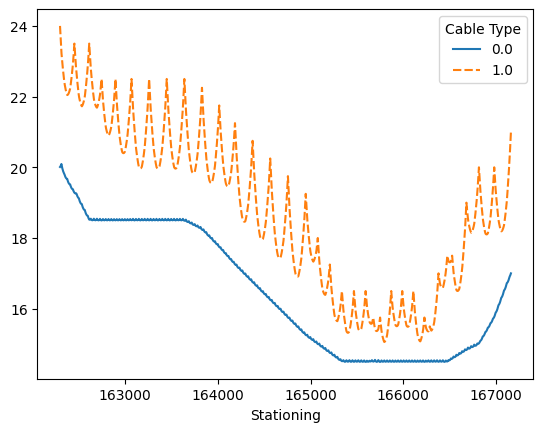

In [31]:
sns.lineplot(data=UpliftSag)

In [32]:
DiffCW = (Uplift.get('LoadedSag')-Nominal.get('LoadedSag'))*12
DiffMW = (Uplift.get('LoadedSag_MW')-Nominal.get('LoadedSag_MW'))*12
DiffSag = pd.DataFrame({'Stationing': np.append(Uplift.get('Stationing'),Uplift.get('Stationing')),
               'Sag': np.append(DiffCW,DiffMW),
               'Cable Type': np.append((Uplift.get('LoadedSag')*0),Uplift.get('LoadedSag_MW')*0+1)})
DiffSag=DiffSag.pivot(index='Stationing', columns='Cable Type', values='Sag')
DiffSag.head()

Cable Type,0.0,1.0
Stationing,,
162297.0,0.000000,0.000000
162298.0,0.000980,0.000952
162299.0,0.001961,0.001905
162300.0,0.002941,0.002857
162301.0,0.003921,0.003810


<Axes: xlabel='Stationing'>

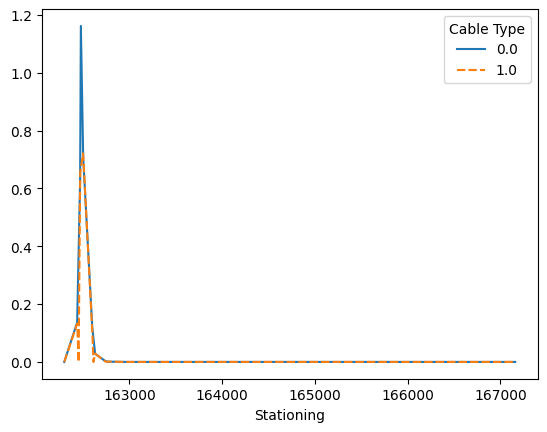

In [33]:
sns.lineplot(data=DiffSag)

In [34]:
ElasticityGraph = pd.DataFrame({'Stationing': np.append(Elasticity.get('STAVal'),Elasticity.get('STAVal')),
               'Uplift': np.append(Elasticity.get('DiffMIN')*12,Elasticity.get('DiffMAX')*12),
               'Min/Max': np.append((Elasticity.get('DiffMIN')*0),Elasticity.get('DiffMAX')*0+1)})
ElasticityGraph=ElasticityGraph.pivot(index='Stationing', columns='Min/Max', values='Uplift')
ElasticityGraph.head()

Min/Max,0.0,1.0
Stationing,,
162452.0,0.0,1.094093
162453.0,0.0,1.091717
162454.0,0.0,1.085467
162455.0,0.0,1.084777
162456.0,0.0,1.071872


<Axes: xlabel='Stationing'>

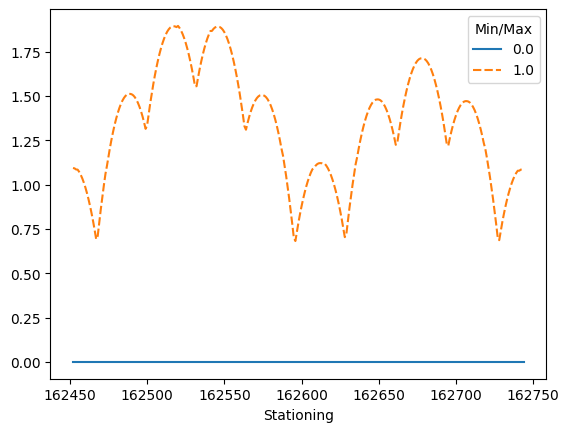

In [35]:
sns.lineplot(data=ElasticityGraph)

In [36]:
# SAVE OUTPUT

In [37]:
NominalSag.to_csv('OutputData.csv')

In [38]:
FullWireRun['STA'].iloc[3]-FullWireRun['STA'].iloc[1]

293.0

In [39]:
Uplift.get('SupportLoad_CW')-Nominal.get('SupportLoad_CW')

array([-2.69577627e-01, -4.83169060e-13,  4.90274488e-13, -1.20792265e-13,
        1.20792265e-13, -3.96834010e+00, -1.56199419e+01, -3.48251826e+00,
        1.86454088e-02, -2.59641374e-04, -8.36273803e-01, -7.81324877e-01,
        5.40824544e-03, -7.04967462e-06, -3.00637744e-02, -3.39390698e-02,
        1.72825138e-04, -2.74382170e-06,  0.00000000e+00, -9.41854197e-04,
       -1.00063376e-03,  9.10257054e-06,  4.01456646e-13, -4.05009359e-13,
        4.05009359e-13, -2.36000374e-05, -2.06500318e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [40]:
len(Uplift.get('SupportLoad_CW'))

159

In [41]:
len(Uplift.get('HA_STA'))

159